<a href="https://colab.research.google.com/github/Mariop730/Mariop730/blob/main/Lab_procesamiento_de_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction to Image Processing in Python**

Andrés G. Marrugo, PhD    
Universidad Tecnológica de Bolívar    

Based on the workshop by [Nian Xiong](https://github.com/xn2333/OpenCV/blob/master/Seminar_Image_Processing_in_Python.ipynb)

This notebook provides an introduction to basic image processing techniques using the OpenCV computer vision library and some standard data analysis libraries in Python.

*The source of this notebook is located at https://github.com/agmarrugo/computer-vision-utb/blob/master/notebooks/01-Image_Processing_in_Python_Final.ipynb*

*Useful intro about [Colab](https://colab.research.google.com/notebooks/welcome.ipynb)*

*Useful intro about [OpenCV](https://opencv.org/)*








##Step 1: Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.









In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

##Step 2: Read Image from Urls

> In this step we will read images from urls, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.

RGB?

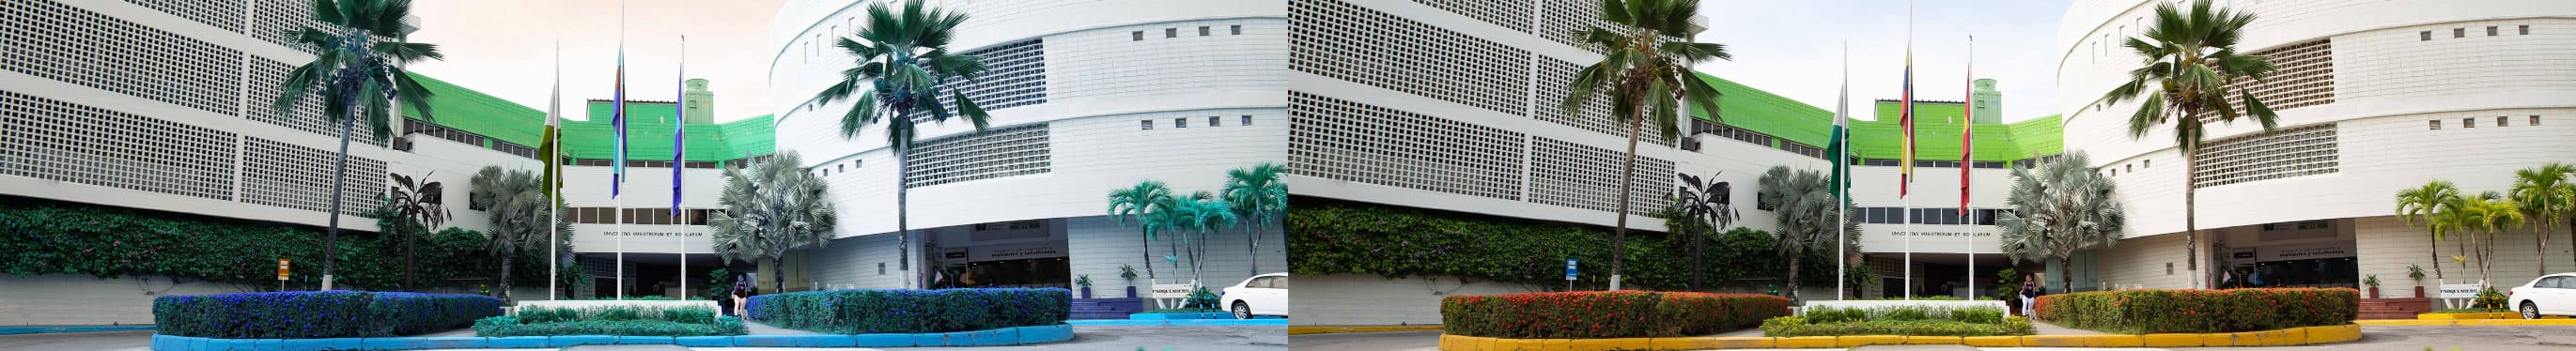

URLError: <urlopen error [SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1006)>

In [2]:
# Create a list to store the urls of the images
urls = ["https://www.utb.edu.co/wp-content/uploads/2021/02/image-background-lautb.jpg",
       "https://doretic.utb.edu.co/wp-content/uploads/2020/11/xDSC_0340-1024x683.jpg.pagespeed.ic.XzfjHhyY-u.jpg",
      "https://placekitten.com/800/571"]
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url)
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

## Step 3: Upload an image, read it and disaplay it

Download the Lenna image to your hardrive from this link https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

Upload it to Colab, read it and display it. Bear in mind that it will be deleted when you close the session.

In [ ]:
try:
  image = cv.imread('Lenna_(test_image).png')
  cv2_imshow(image)
except:
  print("Upload the Lenna image")


## Step 4: Accessing and manipulating pixels

In this step we can access pixel values, modify them, among other operations.


Pixel at (0, 0) - Red: 116, Green: 163, Blue: 183
Pixel at (0, 0) - Red: 0, Green: 0, Blue: 255


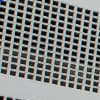

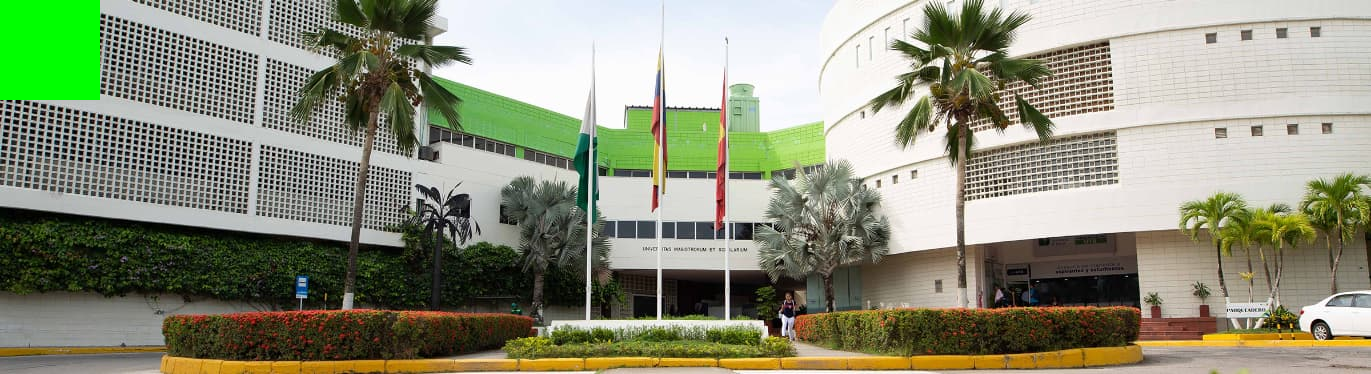

In [3]:
# Images are just NumPy arrays. The top-left pixel can be
# found at (0, 0)
(b, g, r) = image_2[0, 0]
print("Pixel at (0, 0) - Red: %d, Green: %d, Blue: %d" % (r, g, b))

# Now, let's change the value of the pixel at (0, 0) and
# make it blue
image_2[0, 0] = (255, 0, 0)
(b, g, r) = image_2[0, 0]
print("Pixel at (0, 0) - Red: %d, Green: %d, Blue: %d" % (r, g, b))

# Since we are using NumPy arrays, we can apply slicing and
# grab large chunks of the image. Let's grab the top-left
# corner
corner = image_2[0:100, 0:100]
cv2_imshow(corner)

# Let's make the top-left corner of the image green
image_2[0:100, 0:100] = (0, 255, 0)

# Show our updated image
cv2_imshow(image_2)

#### TODO #1: Read an image from a URL, modify it and display it

Image source examples:

[Place Kitten](https://placekitten.com/) - use the base Place Kitten URL followed by a width and height separated by backslashes ''/''. For example, use the URL `https://placekitten.com/500/300` to fetch a cat image with a width of 500px and height of 300px.

[Vecteezy](https://www.vecteezy.com/free-photos) - search for high quality photos with free license. Fro example, use the URL `https://www.vecteezy.com/free-photos/road` to search for an image of a road. Left-click one of the returned images, then right-click on the full image, and then select "Copy Image Address".

[Google Image search](https://www.google.com/imghp?hl=en) - search for an image. Left-click one of the returned images, then right-click on the full image, and then select "Copy Image Address".

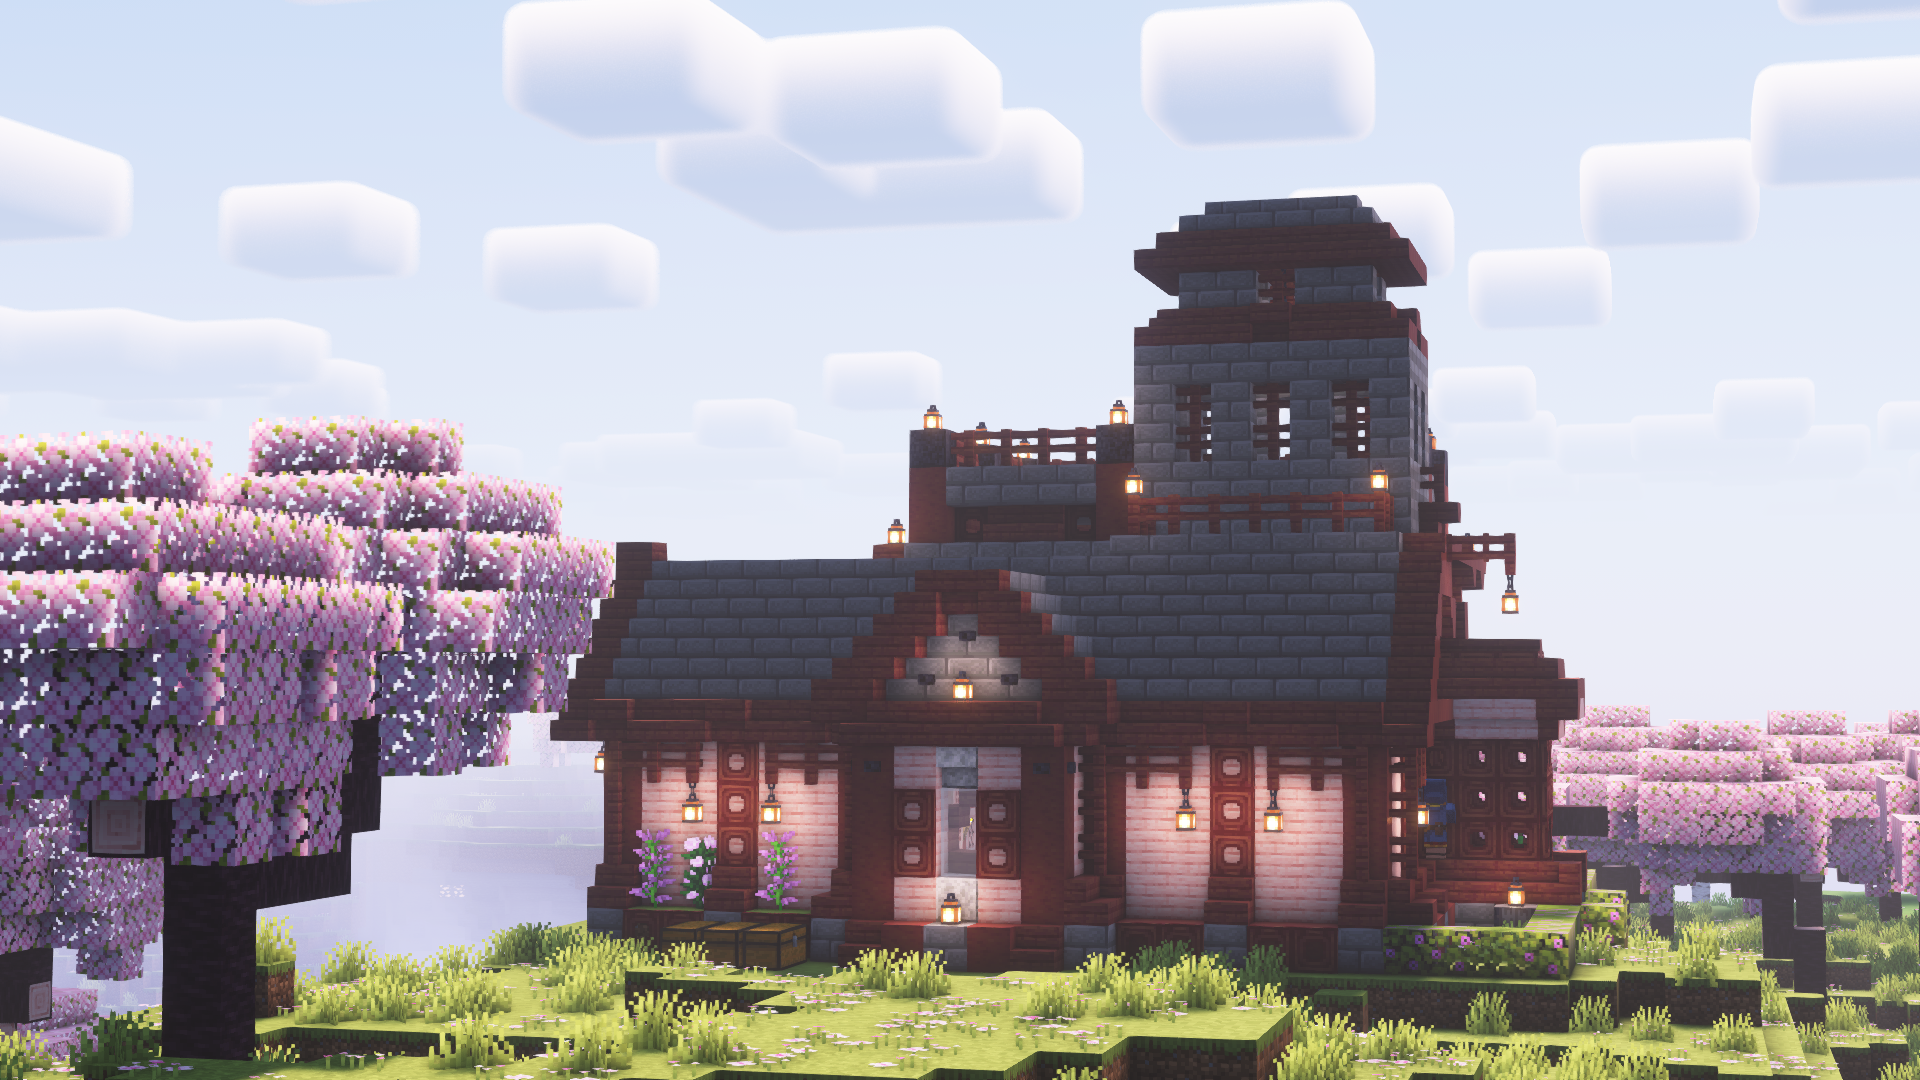

ValueError: could not broadcast input array from shape (3,) into shape (0,0,4)

In [7]:
## TODO: LOAD IMAGE
url = "https://i.redd.it/1-20-cherry-house-build-v0-4fsjoi8ka77b1.png?width=1920&format=png&auto=webp&s=caeed555142fcbf3d79f8c5b6303cb3035b4d94e"
myImg = io.imread(url)
cv2_imshow(cv.cvtColor(myImg, cv.COLOR_BGR2RGB))
## Modify several pixels of the image

img_mod = myImg
img_mod[500:500,500:500] = (255, 0, 0)
cv2_imshow(cv.cvtColor(myImg, cv.COLOR_BGR2RGB))



##Step 5: Image Contours and Histograms

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image
print(image.shape[0])
# Check the width of image
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

### Generate Histogram of color image and grayscale image
Sometimes you want to enhance the contrast in your image or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the matplot.pylab `hist()` function.

More info: [Histogram](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html)

Display the histogram of all the pixels in the color image

In [ ]:
plt.hist(image.ravel(),bins = 256, range = [0,256])
plt.show()

Display the histogram of R, G, B channel
We could observe that the green channel has many pixels in 255, which represents the white patch in the image

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [ ]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

### TODO # 2: DISPLAY THE GRAYSCALE OF YOUR COLOR IMAGE AND GENERATE HISTOGRAM


In [ ]:
#myGrayImg = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
#cv2_imshow()

### Find image contour of the grayscale image

Method 1: Use the matplotlib. contour

More Info: [matplotlib contour](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html)

In [ ]:
plt.contour(gray_image, origin = "image")

Method 2: Use the openCV lib

More info: [Contour](https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html)

In [ ]:
# Set threshold for the countour detection
ret, thresh = cv.threshold(gray_image,150,255,0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(gray_image, contours, -1, (0, 255, 0), 3)
# plt.imshow(gray_image)
cv2_imshow(gray_image)

### TODO # 3: Find the contour of your own image

In [ ]:
# Your code
# plt.contour()

##Step 6: Grayscale Transform and Histogram Equalization


### Grayscale Transformation
This section provides some examples of conducting mathematical transformations of the grayscale image

In [ ]:
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright

im2 = 255 - gray_image
cv2_imshow(im2)

In [ ]:
# Another transform of the image, after adding a constant,
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

In [ ]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

### TODO #4:  Try some mathematical operations on your image


In [ ]:
## Implement your code here
## myGrayImgTrans = myGrayImg...
## cv2_imshow(myGrayImgTrans)

## Step 7: Image warping

 **Perspective Warp**. The aim of this activity is to familiarize students with the concept of perspective warping, which changes the viewpoint of an image.

### Instructions:

1. Display an original image.   
2. Apply a pre-defined perspective warp to it.   
3. Display the warped image.   

In [ ]:
import cv2

# To fetch a sample image from the web
import urllib.request

# Fetching a sample image
url = "https://placekitten.com/600/450"
image_path, _ = urllib.request.urlretrieve(url)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define four source coordinates
src_pts = np.array([
    [100, 100],
    [500, 100],
    [500, 400],
    [100, 400]
], dtype=np.float32)

# Define four destination coordinates (for warping)
dst_pts = np.array([
    [0, 0],
    [600, 0],
    [550, 450],
    [50, 450]
], dtype=np.float32)

# Compute the perspective matrix
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

# Warp the image
warped_image = cv2.warpPerspective(image, M, (image.shape[1], image.shape[0]))

# Display the original and warped images
print("Original Image:")
cv2_imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
print("Warped Image:")
cv2_imshow(cv2.cvtColor(warped_image, cv2.COLOR_RGB2BGR))


### TODO #5:  Other warping

1. Choose a different set of source and destination coordinates to achieve a different perspective warp.  
2. What happens when the destination points are moved closer together or further apart?  

### OPTIONAL

Feel free to load other images, modify them, explore other image processing functions available in OpenCV.

In [ ]:
## OPTIONAL

## Add your code